# 파이썬으로 배우는 기초 통계와 통계 기반 데이터 분석
- 강사 : 백설희

##구글 드라이브 파일 연동

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 나의 루트 경로 설정
rootdir = '/content/drive/MyDrive/Colab Notebooks/통계'

In [3]:
import seaborn as sns

import pandas as pd
import numpy as np
import os

tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')

In [4]:
# seaborn의 dataset 목록
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
taxis = pd.read_csv(os.path.join(rootdir, 'data', 'taxis.csv'))

In [30]:
import seaborn as sns
import numpy as np
import pandas as pd
import os

pd.options.display.float_format = '{: .20f}'.format

filepath = os.path.join(rootdir, 'data', 'ex6.csv')
chunker = pd.read_csv(filepath, chunksize=1000)
total = pd.Series([])
index = 1
for chunk in chunker:
  total = total.add(chunk['one'].value_counts(), fill_value=0.0) # for문 안에서는 , 바깥에서는 전체 집계
  print(f'chunk {index}의 분석 결과:', sum(list(map(float, total.keys())))/total.sum(), ', len : ', len(total), ', sum : ', total.sum())
  index += 1

total_lst = list(map(float, total.keys()))
total_count = len(total_lst)
total_sum = sum(total_lst)

print("'one'열의 표본평균:", total_sum/total_count)

chunk 1의 분석 결과: 0.04575016080420037 , len :  1000 , sum :  1000.0
chunk 2의 분석 결과: 0.022875080402100186 , len :  1000 , sum :  2000.0
chunk 3의 분석 결과: 0.015250053601400124 , len :  1000 , sum :  3000.0
chunk 4의 분석 결과: 0.011437540201050093 , len :  1000 , sum :  4000.0
chunk 5의 분석 결과: 0.009150032160840075 , len :  1000 , sum :  5000.0
chunk 6의 분석 결과: 0.007625026800700062 , len :  1000 , sum :  6000.0
chunk 7의 분석 결과: 0.00653573725774291 , len :  1000 , sum :  7000.0
chunk 8의 분석 결과: 0.005718770100525046 , len :  1000 , sum :  8000.0
chunk 9의 분석 결과: 0.005083351200466707 , len :  1000 , sum :  9000.0
chunk 10의 분석 결과: 0.004575016080420037 , len :  1000 , sum :  10000.0
'one'열의 표본평균: 0.04575016080420037


In [10]:
type(total)

pandas.core.series.Series

In [11]:
total.keys()

Index([  0.467976300189, -0.0325374154026,   0.727674783924,   0.287110072224,
         -1.09946636266,     2.1283707566,  -0.839113824688,   0.883543016678,
         0.394935659169,   -1.23974059305,
       ...
          2.83389146282,  -0.128270349801,     1.2479672656,   0.273832207653,
         0.702012139939,   -1.01616433854,    1.06324882728,  -0.345091855756,
          0.58027291123, -0.0963755510259],
      dtype='float64', name='one', length=1000)

In [19]:
total

one
 0.46797630018899999405    10.00000000000000000000
-0.03253741540260000203    10.00000000000000000000
 0.72767478392399997933    10.00000000000000000000
 0.28711007222399997918    10.00000000000000000000
-1.09946636266000008497    10.00000000000000000000
                                    ...           
-1.01616433854000010051    10.00000000000000000000
 1.06324882728000003063    10.00000000000000000000
-0.34509185575599998774    10.00000000000000000000
 0.58027291123000002138    10.00000000000000000000
-0.09637555102589999423    10.00000000000000000000
Length: 1000, dtype: object

In [24]:
chunker2 = pd.read_csv(filepath, chunksize=1000)

In [25]:
p = next(chunker2)
print(p)

                        one                     two                   three  \
0    0.46797630018899999405 -0.03864853962550000160 -0.29534425198699998383   
1   -0.35889346954299999881  1.40445260006999994573  0.70496464492599997254   
2   -0.50184039929000001656  0.65925370722300002946 -0.42169061931200002569   
3    0.20488621220200001205  1.07413396503999991616  1.38836131252000005709   
4    0.35462791448399999528 -0.13311585229600000901  0.28376263797799999855   
..                      ...                     ...                     ...   
995  2.31189587899000015270 -0.41707032545000000123 -1.40959852634999993626   
996 -0.47989296997300001646 -0.65041853099799995519  0.74515211981800000274   
997  0.52333074886800001746  0.78711211322100005372  0.48606614250800000976   
998 -0.36255943198800000271  0.59889399303799994989 -1.84320146381000005142   
999 -0.09637555102589999423 -1.01299883546999991424 -0.65743148080699997937   

                       four key  
0   -1.8247262272

In [26]:
type(p)

pandas.core.frame.DataFrame

In [29]:
mean = 0.0465343434

s1 = "%.3f" % mean
s2 = "{:.3f}".format(mean)
s3 = f"{mean:.3f}"

print(s1)
print(s2)
print(s3)

0.047
0.047
0.047


In [31]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00000000000000000000,1,0,7.25000000000000000000,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00000000000000000000,1,0,71.28329999999999699867,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00000000000000000000,0,0,7.92499999999999982236,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00000000000000000000,1,0,53.10000000000000142109,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00000000000000000000,0,0,8.05000000000000071054,S,Third,man,True,NaN,Southampton,no,True


In [32]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [48]:
print('count : ', titanic['age'].count())     # 결측치 제외
print('len : ', len(titanic['age']))
print('size : ', titanic['age'].size)
print('shape[0] : ', titanic['age'].shape[0])

count :  714
len :  891
size :  891
shape[0] :  891


## 전일 추가학습

### 표본평균 구하기

In [53]:
chunker = pd.read_csv(filepath, chunksize=1000)
p = next(chunker)
print(p)

                        one                     two                   three  \
0    0.46797630018899999405 -0.03864853962550000160 -0.29534425198699998383   
1   -0.35889346954299999881  1.40445260006999994573  0.70496464492599997254   
2   -0.50184039929000001656  0.65925370722300002946 -0.42169061931200002569   
3    0.20488621220200001205  1.07413396503999991616  1.38836131252000005709   
4    0.35462791448399999528 -0.13311585229600000901  0.28376263797799999855   
..                      ...                     ...                     ...   
995  2.31189587899000015270 -0.41707032545000000123 -1.40959852634999993626   
996 -0.47989296997300001646 -0.65041853099799995519  0.74515211981800000274   
997  0.52333074886800001746  0.78711211322100005372  0.48606614250800000976   
998 -0.36255943198800000271  0.59889399303799994989 -1.84320146381000005142   
999 -0.09637555102589999423 -1.01299883546999991424 -0.65743148080699997937   

                       four key  
0   -1.8247262272

In [50]:
result = pd.read_csv(filepath)
result['one'].mean()

0.04575016080420037

In [51]:
chunker = pd.read_csv(filepath, chunksize=1000)
sum_ = 0.0
count_ = 0.0
for piece in chunker:
  sum_ += piece['one'].sum()
  count_ += piece['one'].count()
mean_ = sum_ / (count_)
print(mean_)
print(result['one'].mean())

0.04575016080420038
0.04575016080420037


### 실수 포맷 설정

In [52]:
s1 = "%.3f" % mean_
s2 = "{:.3f}".format(mean_)
s3 = f"{mean_:.3f}"

print(s1)
print(s2)
print(s3)

0.046
0.046
0.046


### 분산 구하기

In [59]:
# 분산
chunker = pd.read_csv(filepath, chunksize=1000)
total = 0.0
for piece in chunker:
   # total += ((mean_ - piece['one'])**2).sum()
   total += ((piece['one'] - mean_)**2).sum()     # (개별표본값 - 표본평균)의 제곱 의 합계

var_ = total / (count_ - 1)
print(var_)
print(result['one'].var())
print(result['one'].std())

0.9002680209238878
0.9002680209238879
0.9488245469652901


## 금일 작업

### 기술통계
- 자료의 종류와 구조
  - 통계분석 방법은 자료의 속성과 분석 목적에 따라 달라짐.
  - 분석하고자 하는 자료가 분석방법에서 가정한 조건을 얼마나 만족하는지에 따라 분석 방법의 적절성이 결정
    - 자료의 속성에 따른 분류 필요

- 회귀모델구현시, 독립변수가 범주형도 전처리하여 사용가능하나, 주 영향을 주는 독립변수가 범주형인 경우에는 회귀모델의 정확성이 떨어질수 있다.

### 도수분포표
- 히스토그램으로 그릴수 있다.
- 분할표
  - 두 개 이상의 변수를 동시에 고려하여, 관측개체의 빈도를 정리할 필요가 있음



In [68]:
import seaborn as sns
import pandas as pd

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.98999999999999843681,1.01000000000000000888,Female,No,Sun,Dinner,2
1,10.33999999999999985789,1.65999999999999992006,Male,No,Sun,Dinner,3
2,21.01000000000000156319,3.50000000000000000000,Male,No,Sun,Dinner,3
3,23.67999999999999971578,3.31000000000000005329,Male,No,Sun,Dinner,2
4,24.58999999999999985789,3.60999999999999987566,Female,No,Sun,Dinner,4


In [69]:
# 소수점 자릿수 설정
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [70]:
tips['total_bill'].value_counts()

total_bill
13.42    3
13.81    2
15.98    2
17.92    2
10.07    2
        ..
24.71    1
21.16    1
28.97    1
22.49    1
18.78    1
Name: count, Length: 229, dtype: int64

In [74]:
tips['total_bill'].describe()

count   244.00
mean     19.79
std       8.90
min       3.07
25%      13.35
50%      17.80
75%      24.13
max      50.81
Name: total_bill, dtype: float64

In [85]:
# cut은 구간경계로 나눈거라, 각 구간의 개수가 동일하지 않다
pd.cut(tips['total_bill'], bins=4, labels=['A', 'B', 'C', 'D'])
pd.cut(tips['total_bill'], bins=4, labels=['A', 'B', 'C', 'D']).value_counts()

total_bill
B    119
A     80
C     34
D     11
Name: count, dtype: int64

In [93]:
# cut의 구간 경계를 지정하기
pd.cut(tips['total_bill'], [0, 10, 30, 50, 100], labels=['A', 'B', 'C', 'D'])
pd.cut(tips['total_bill'], [0, 10, 30, 50, 100], labels=['A', 'B', 'C', 'D']).value_counts(normalize = True)

total_bill
B   0.80
C   0.13
A   0.07
D   0.00
Name: proportion, dtype: float64

In [87]:
# qcut은 각 구간의 개수가 동일하다
pd.qcut(tips['total_bill'], q=4, labels=['A', 'B', 'C', 'D'])
pd.qcut(tips['total_bill'], q=4, labels=['A', 'B', 'C', 'D']).value_counts()

total_bill
A    61
B    61
C    61
D    61
Name: count, dtype: int64

In [95]:
# qcut 비율을 정해서 나누기
pd.qcut(tips['total_bill'], [0.0, 0.1, 0.5, 0.7, 1.0], labels=['A', 'B', 'C', 'D']).value_counts()

total_bill
B    96
D    73
C    49
A    26
Name: count, dtype: int64

<Axes: xlabel='total_bill'>

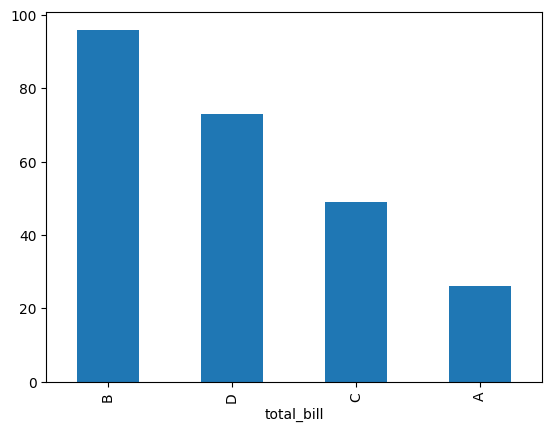

In [96]:
# qcut 비율을 정해서 나누기
pd.qcut(tips['total_bill'], [0.0, 0.1, 0.5, 0.7, 1.0], labels=['A', 'B', 'C', 'D']).value_counts().plot(kind='bar')

In [99]:
tips.tail(2)

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [104]:
pd.crosstab(index = tips['sex'], columns = tips['smoker'])

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [109]:
tips.groupby(['sex', 'smoker'])['smoker'].count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: smoker, dtype: int64

### 분할표 및 k-차원 분할표
- groupby 연산
- pivot_table

In [110]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [132]:
result = tips[['tip', 'sex', 'smoker']].groupby(['sex', 'smoker']).agg(['mean', 'sum'])

In [133]:
result.head()

tip       
              mean    sum
sex    smoker            
Male   Yes    3.05 183.07
       No     3.11 302.00
Female Yes    2.93  96.74
       No     2.77 149.77

In [139]:
result2 = result.unstack(level=0)
result2

tip                     
       mean           sum       
sex    Male Female   Male Female
smoker                          
Yes    3.05   2.93 183.07  96.74
No     3.11   2.77 302.00 149.77

In [141]:
result2.stack()

tip       
              mean    sum
smoker sex               
Yes    Male   3.05 183.07
       Female 2.93  96.74
No     Male   3.11 302.00
       Female 2.77 149.77

In [136]:
result.unstack(level=1)

tip                   
       mean         sum       
smoker  Yes   No    Yes     No
sex                           
Male   3.05 3.11 183.07 302.00
Female 2.93 2.77  96.74 149.77

In [142]:
result2.index

CategoricalIndex(['Yes', 'No'], categories=['Yes', 'No'], ordered=False, dtype='category', name='smoker')

In [143]:
result2.columns

MultiIndex([('tip', 'mean',   'Male'),
            ('tip', 'mean', 'Female'),
            ('tip',  'sum',   'Male'),
            ('tip',  'sum', 'Female')],
           names=[None, None, 'sex'])

### 그래프를 이용한 자료정리